In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from Finite_volume_method_1D import *

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Computer Modern",
    "figure.dpi": 100,
})

In [2]:
chippath = '../../DataKian/Al_LT165chip7/'
Al_data = KID_data(chippath,
                   lambda_ph_in_nm=673,
                   KIDno=2,
                   readout_power=89,
                   temp_in_mK=120,
                   width=10,
                   length=310,
                   T_eff=0.225,
                   N0=172e8,
                   sigma_IC=5,
                   D=15000)

chippath = '../../DataKian/bTa_LT278W2chip5/'
bTa_data = KID_data(chippath,
                    lambda_ph_in_nm=673,
                    KIDno=3,
                    readout_power=96,
                    temp_in_mK=140,
                    width=10,
                    length=90,
                    T_eff=0.100,
                    N0=303e8,
                    sigma_IC=5,
                    D=50)

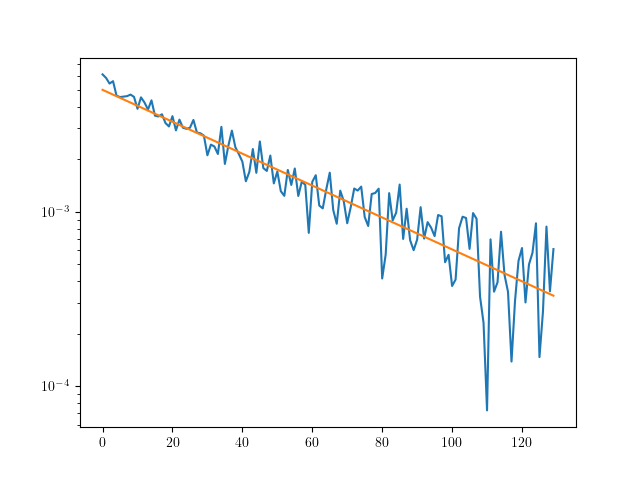

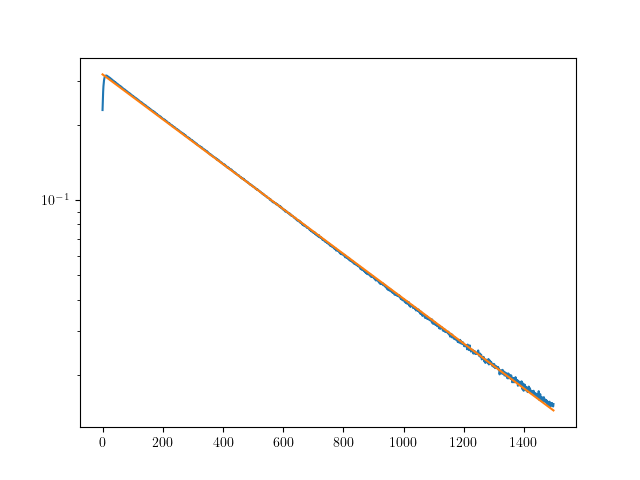

In [3]:
bTa_data.fit_tail(start=175,end=305)
Al_data.fit_tail(start=500)

In [5]:
bTa_sim=KID_sim(bTa_data,0.25,2.5,300,method='CrankNicolson')
Al_sim=KID_sim(Al_data,0.25,2.5,300,method='CrankNicolson')

100%|██████████| 1200/1200 [00:23<00:00, 51.10it/s]


In [ ]:
compbTa = sim_data_comp(bTa_data,bTa_sim)
compAl = sim_data_comp(Al_data,Al_sim)

In [ ]:
print(bTa_data.eta_pb)
print(Al_data.eta_pb)
plt.figure()
plt.semilogy(compbTa.t_full,compbTa.phasedata)
plt.semilogy(compbTa.t_sim_aligned,compbTa.phasesim)
plt.show()
plt.figure()
plt.semilogy(compAl.t_full,compAl.phasedata)
plt.semilogy(compAl.t_sim_aligned,compAl.phasesim)
plt.show()


In [6]:
bTa_data.nqp_thermal

0.4435823845583293

In [7]:
bTa_data.T_eff

0.1